In [ ]:
'''
This Code is Written By Bilal Riaz
for the Implementation of CNOT gate in 
'''

System Hamiltonian for two qubit quantum system with Ising type interaction can be given as:  
                               $$ H(t)=\frac{J}{4} \cdot \sigma_z^{(1)}\sigma_z^{(2)} + \sum\limits_i \epsilon_i(t) H_i $$ 
where $J$ denotes interaction strength, For Krotov type methods objective function can be chosen to be:

$$ J = \Re \Bigg[ \big\vert U_f^\dagger U(T) \big\vert - \int_0^T Tr \bigg\{ \bigg ( \frac{\partial U}{\partial t} + \frac{i}{\hbar}\cdot H(t)U  \bigg ) \Lambda\Bigg \} dt  - \int _0^T \sum\limits_{i} \big\vert \epsilon _i (t) \big\vert^2 dt\Bigg ]  $$

Computing First Variations $\delta J \big \vert_\Lambda$, $\delta J \big \vert_U$ and $\delta J \big \vert_{\epsilon_{i}}$
 results into Forward Propagation:  
                   $$\frac{\partial U}{\partial t} = -\frac{i}{\hbar} H(t)U$$
 with Iinitial Condition $U(0) = \mathbb {1}_N $,  Backward Propagation:
                   $$\frac{\partial \Lambda}{\partial t} = \frac{i}{\hbar} \Lambda H(t)$$
            
with condition $\Lambda(T) = U_f $ and control equation:
$$\epsilon_i(t) = -\frac{1}{2\lambda\hbar} \Im{\bigg\{Tr\big( \Lambda H_i U \big )  \bigg\}}$$
 
 To solve this problem , we will apply adopt the method proposed by Zhu and Rebitz

Cycle :  0
Cycle :  1
Cycle :  2
Cycle :  3
Cycle :  4
Cycle :  5
Cycle :  6
Cycle :  7
Cycle :  8
Cycle :  9
Cycle :  10
Cycle :  11
Cycle :  12
Cycle :  13
Cycle :  14
Cycle :  15
Cycle :  16
Cycle :  17
Cycle :  18
Cycle :  19
Cycle :  20
Cycle :  21
Cycle :  22
Cycle :  23
Cycle :  24
Cycle :  25
Cycle :  26
Cycle :  27
Cycle :  28
Cycle :  29
Cycle :  30
Cycle :  31
Cycle :  32
Cycle :  33
Cycle :  34
Cycle :  35
Cycle :  36
Cycle :  37
Cycle :  38
Cycle :  39
Cycle :  40
Cycle :  41
Cycle :  42
Cycle :  43
Cycle :  44
Cycle :  45
Cycle :  46
Cycle :  47
Cycle :  48
Cycle :  49
Cycle :  50
Cycle :  51
Cycle :  52
Cycle :  53
Cycle :  54
Cycle :  55
Cycle :  56
Cycle :  57
Cycle :  58
Cycle :  59
Cycle :  60
Cycle :  61
Cycle :  62
Cycle :  63
Cycle :  64
Cycle :  65
Cycle :  66
Cycle :  67
Cycle :  68
Cycle :  69
Cycle :  70
Cycle :  71
Cycle :  72
Cycle :  73
Cycle :  74
Cycle :  75
Cycle :  76
Cycle :  77
Cycle :  78
Cycle :  79
Cycle :  80
Cycle :  81
Cycle :  82
Cycle :  83
Cy

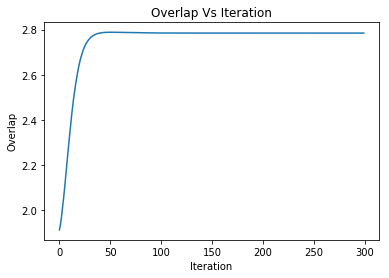

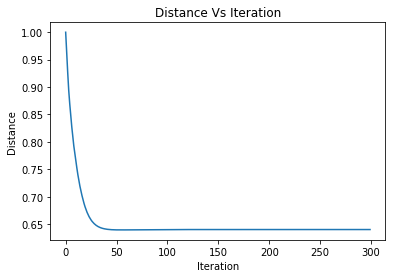

In [37]:
'''
Krotov Algorithm for Quantum gate Implementation
Written By Bilal Riaz
'''

import matplotlib
import scipy.stats
import scipy.linalg
import scipy.sparse.linalg
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.random as rnd
import scipy.linalg as LA
from scipy.integrate import ode


class Krotov:
    def __init__(self,J,lambda_1,ti,tf,steps):
        self.J = float(J)
        self.lambda_1 = float(lambda_1)
        self.ti = ti
        self.tf = tf
        self.steps = steps

        self.dt = (self.tf - self.ti) /self.steps
        self.sX = np.array([[0, 1], [1, 0]], dtype = 'complex')
        self.sY = np.array([[0, -1j], [1j, 0]], dtype = 'complex')
        self.sZ = np.array([[1, 0], [0, -1]], dtype = 'complex')
        self.I = np.array(np.identity(2), dtype = 'complex')

        self.sZZ = np.kron(self.sZ, self.sZ)
        self.sIY = np.kron(self.I, self.sY)
        self.sYI = np.kron(self.sY, self.I)
        self.sIZ = np.kron(self.I, self.sZ)
        self.sZI = np.kron(self.sZ, self.I)

        self.delta1 = 0.1
        self.alpha1 = 0.1
        self.delta2 = 0.3
        self.alpha2 = 0.1
        self.delta3 = 0.2
        self.alpha3 = 0.1
        self.delta4 = 0.2
        self.alpha4 = 0.1
        rnd.seed(1)

        # Controls
        self.EZZ = rnd.rand(self.steps)-0.5
        #self.EYI_tilde = self.EYI
        self.EZZ_tilde = np.zeros((self.steps,))
        self.EIY = rnd.rand(self.steps)-0.5
        #self.EIY_tilde = self.EIY
        self.EIY_tilde = np.zeros((self.steps,))
        self.EZI = rnd.rand(self.steps)-0.5
        #self.EZI_tilde = self.EZI
        self.EZI_tilde = np.zeros((self.steps,))
        self.EIZ = rnd.rand(self.steps)-0.5
        #self.EIZ_tilde = self.EIZ
        self.EIZ_tilde = np.zeros((self.steps,))

        self.Ui = np.identity(4, dtype = 'complex')
        self.UT = np.exp(1j * np.pi/4)*np.array([[1, 0, 0, 0],[0, 1, 0, 0],[0, 0, 0, 1],[0, 0, 1, 0]], dtype = 'complex')

        self.U = np.zeros([self.steps, 4, 4], dtype = 'complex')
        self.B = np.zeros([self.steps, 4, 4], dtype = 'complex')

        self.U[0] = np.identity(4, dtype = 'complex')
        self.B[steps - 1] = self.UT

        self. Ho = self.J/4 * np.kron(self.I,self.I)

    def Hc(self, t_index):
        t = t_index
        return (self.EZZ[t] * self.sZZ + self.EIY[t] * self.sIY + self.EZI[t] * self.sZI + self.EIZ[t] * self.sIZ )

    def Hc_tilde(self, t_index):
        t = t_index
        return (self.EZZ_tilde[t] * self.sZZ + self.EIY_tilde[t] * self.sIY + self.EZI_tilde[t] * self.sZI + self.EIZ_tilde[t]* self.sIZ)

    def H(self, t_index):
        t = t_index
        return (self.Ho + self.Hc(t))

    def H_tilde(self, t_index):
        t = t_index
        return (self. Ho + self.Hc_tilde(t))

    def update_U (self, t_index):
        t = t_index
        self.U[t+1] = np.dot(LA.expm(-1j * self.H(t) * self.dt), self.U[t])

    def update_B (self, t_index):
        t = t_index
        self.B[t-1] = np.dot( self.B[t], LA.expm(-1j * self.H_tilde(t) * self.dt))

    def update_E(self, t_index):
        t=t_index
        EZZpart1 = (1-self.delta1) * self.EZZ_tilde[t-1]
        EZZpart2 = -self.delta1 * self.lambda_1 * np.imag( np.trace(np.dot(self.B[t-1], np.dot( self.sZZ, self.U[t]) ) ) )/ self.alpha1
        self.EZZ[t] = -(EZZpart1 + EZZpart2)

        EIYpart1 = (1-self.delta2) * self.EIY_tilde[t-1]
        EIYpart2 = -self.delta2 * self.lambda_1 * np.imag( np.trace(np.dot(self.B[t-1], np.dot( self.sIY, self.U[t]) ) ) )/ self.alpha2
        self.EIY[t] = -(EIYpart1 + EIYpart2)

        EZIpart1 = (1-self.delta3) * self.EZI_tilde[t-1]
        EZIpart2 = -self.delta3 * self.lambda_1 * np.imag( np.trace(np.dot(self.B[t-1], np.dot( self.sZI, self.U[t]) ) ) )/ self.alpha3
        self.EZI[t] = -(EZIpart1 + EZIpart2)

        EIZpart1 = (1-self.delta4) * self.EIZ_tilde[t-1]
        EIZpart2 = -self.delta4 * self.lambda_1 * np.imag( np.trace(np.dot(self.B[t-1], np.dot( self.sIZ, self.U[t]) ) ) )/ self.alpha4
        self.EIZ[t] = -(EIZpart1 + EIZpart2)


    def update_E_tilde(self,t_index):
        t=t_index
        EZZpart1 = (1-self.delta1) * self.EZZ[t]
        EZZpart2 = -self.delta1 * self.lambda_1 * np.imag( np.trace(np.dot(self.B[t], np.dot( self.sZZ, self.U[t]) ) ) )/ self.alpha1
        self.EZZ_tilde[t] = -(EZZpart1 + EZZpart2)

        EIYpart1 = (1-self.delta2) * self.EIY[t]
        EIYpart2 = -self.delta2 * self.lambda_1 * np.imag( np.trace(np.dot(self.B[t], np.dot( self.sIY, self.U[t]) ) ) )/ self.alpha2
        self.EIY_tilde[t] = -(EIYpart1 + EIYpart2)

        EZIpart1 = (1-self.delta3) * self.EZI[t]
        EZIpart2 = -self.delta3 * self.lambda_1 * np.imag( np.trace(np.dot(self.B[t], np.dot( self.sZI, self.U[t]) ) ) )/ self.alpha3
        self.EZI_tilde[t] = -(EZIpart1 + EZIpart2)

        EIZpart1 = (1-self.delta4) * self.EIZ[t]
        EIZpart2 = -self.delta4 * self.lambda_1 * np.imag( np.trace(np.dot(self.B[t], np.dot( self.sIZ, self.U[t]) ) ) )/ self.alpha4
        self.EIZ_tilde[t] = -(EIZpart1 + EIZpart2)

    def evolution_U(self,string='not initial'):
        if string == 'initial':
            for t in range(0,self.steps-1):
                self.update_U(t)
        else:
            for t in range(0,self.steps-1):
                self.update_E(t)
                self.update_U(t)
            t = self.steps-1
            self.update_E(t)

    def evolution_B(self):
        for t in range(self.steps-1,0,-1):
            self.update_E_tilde(t)
            self.update_B(t)
        t = 0
        self.update_E_tilde(t)

    def O(self,step):
        t = step
        return( np.dot(self.UT.conj().T, self.U[t] ))
        # Returns <<PSI|O|PSI>>>
    def Overlap(self, t_index ):
        t = t_index
        return( np.abs(np.trace(self.O(t))))

    def distance(self,t_index):
        t= t_index
        return(LA.norm(self.UT - self.U[t], 'fro'))

    def Run_Krotov(self, num_iter):
        T = self.steps-1
        self.evolution_U('initial')
        self.overlap = []
        self.dis = []

        for i in range(0,num_iter):
            print ("Cycle : ", i)
            self.B[T] = self.UT.conj().T
            self.evolution_B()
            self.evolution_U()
            self.overlap.append(self.Overlap(T))
            self.dis.append(self.distance(T))
if __name__ == '__main__':
    # INTITIALIZE : J,lambda_1,ti,tf,steps

    k = Krotov(0.1, 0.1 ,0, 8,100)
    k.Run_Krotov(300)
    s = Krotov(0.1, 0.1 ,0, 8,100)
    s.Run_Krotov(0)

    plt.figure(1)
    plt.title('Overlap Vs Iteration')
    plt.ylabel('Overlap')
    plt.xlabel('Iteration')
    plt.plot(np.abs(k.overlap))
    plt.show()

    plt.figure(2)
    plt.title('Distance Vs Iteration')
    plt.ylabel('Distance')
    plt.xlabel('Iteration')
    plt.plot(k.dis/np.amax(k.dis))
    plt.show()



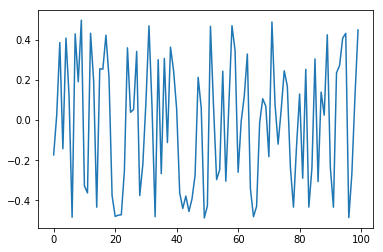

In [28]:
plt.plot(s.EIY)

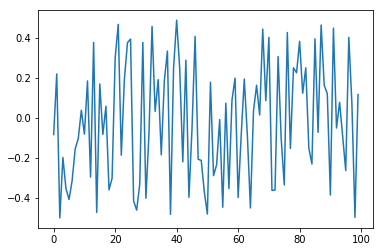

In [29]:
plt.plot(s.EYI)

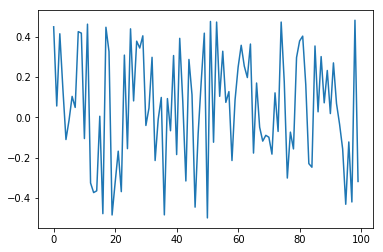

In [30]:
plt.plot(s.EZI)

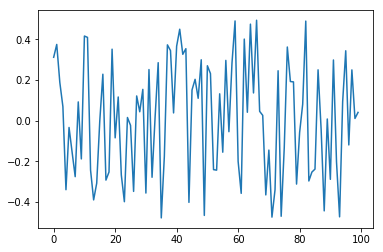

In [31]:
plt.plot(s.EIZ)